## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


   city_development_index  training_hours  target  gender_Female  gender_Male  \
0                   0.920              36     1.0              0            1   
1                   0.776              47     0.0              0            1   
2                   0.624              83     0.0              0            0   
3                   0.789              52     1.0              0            0   
4                   0.767               8     0.0              0            1   

   gender_Other  enrolled_university_Full time course  \
0             0                                     0   
1             0                                     0   
2             0                                     1   
3             0                                     0   
4             0                                     0   

   enrolled_university_Part time course  enrolled_university_no_enrollment  \
0                                     0                                  1   
1             

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Voting Accuracy= 0.7663535142658316
Since Classification Tree Model has the highest accuracy score, it is the most promising model.


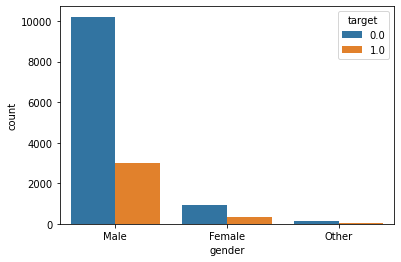

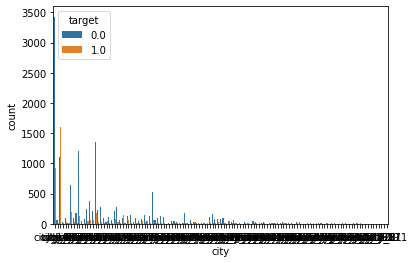

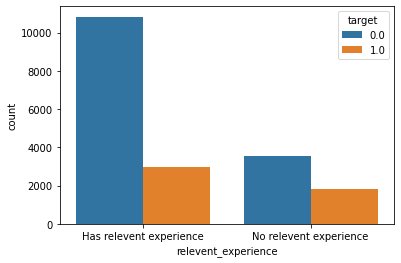

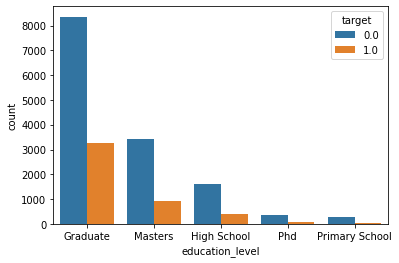

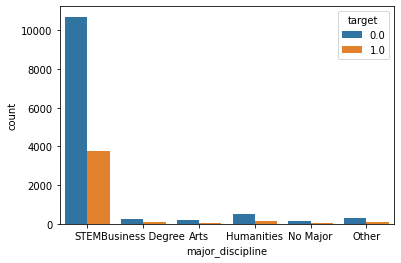

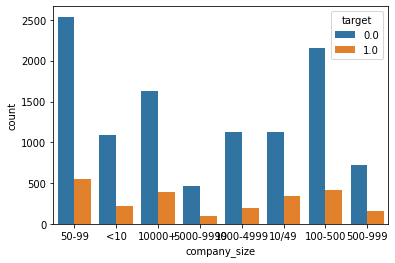

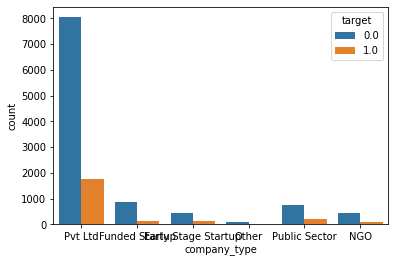

In [14]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read the dataset into a dataframe
data = pd.read_csv('jobs_change.csv')
display(data.head())
data.shape

# Check for missing values
data.isna().any()
data.replace('NaN', 'Unknown', inplace=True)
# Plot the graph of gender against job change
plt.figure()
gender_plot = sns.countplot(x= data['gender'], hue= 'target', data= data)
# Plot the graph of city against job change
plt.figure()
company_plot = sns.countplot(x= data['city'], hue= 'target', data= data)
# Plot the graph of experience against job change
plt.figure()
experience_plot = sns.countplot(x= data['relevent_experience'], hue= 'target', data= data)
# Plot the graph of education level against job change
plt.figure()
education_plot = sns.countplot(x= data['education_level'], hue= 'target', data= data)
# Plot the graph of major against job change
plt.figure()
major_plot = sns.countplot(x= data['major_discipline'], hue= 'target', data= data)
# Plot the graph of company size against job change
plt.figure()
company_plot = sns.countplot(x= data['company_size'], hue= 'target', data= data)
# Plot the graph of company type against job change
plt.figure()
company_plot = sns.countplot(x= data['company_type'], hue= 'target', data= data)

# Drop the irrelevant features
data.drop(['enrollee_id', 'city', 'company_size', 'company_type'],axis = 1, inplace = True)
# Convert 'experience' and 'last_new_job' into categorical variables
data['experience'].replace({'<1':0,'>20':21, 'Unknown':-1}).astype('float')
data['last_new_job'].replace({'never':0,'>4':5, 'Unknown':-1}).astype('float')
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['gender','enrolled_university','relevent_experience','education_level','major_discipline', 'experience','last_new_job'])
pd.set_option('display.max_columns', None)
print(data.head())

# Split into features and targets using iloc to select columns
X = data.drop("target",axis=1)
y = data["target"]
print(y)

# Partition the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Get the baseline accuracy 
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

# Fit the training data to a classification tree model
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
training_pred = dt.predict(X_train)
acc_training = accuracy_score(training_pred, y_train)
print('Classification Tree Accuracy=', acc_training)

# Fit the training data to a bagging model
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Bagging Accuracy=', acc_bagging)

# Fit the training data to a random forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_features=5)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
print('Random Forest Accuracy=', accuracy_score(y_test, predict_rf))

# Fit the training data to an adaboost model
from sklearn.ensemble import AdaBoostClassifier
base_est = DecisionTreeClassifier(max_depth=5)
ada_boost = AdaBoostClassifier(base_est, n_estimators=100, learning_rate=.05)
ada_boost.fit(X_train, y_train)
print('Adaboost Accuracy=', accuracy_score(y_test, ada_boost.predict(X_test)))

# Fit the training data to a voting model
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
rfClf = RandomForestClassifier(n_estimators=100) 
svmClf = SVC(probability=True) 
logClf = LogisticRegression()
dtClf = DecisionTreeClassifier(max_depth=5)
clf = VotingClassifier(estimators = [('rf',rfClf), ('svm',svmClf), ('log', logClf), ('dtClf', dtClf)], voting='soft') 
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print('Voting Accuracy=', accuracy_score(y_test, clf_pred))

# conclude on the best fitting model
print('Since Classification Tree Model has the highest accuracy score, it is the most promising model.')